<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/ex_sampling_generate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
clear

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm

from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('https://github.com/iam-fern/Research/raw/main/sampling_generate_data.csv', index_col=['rep', 'index'])
df

Xt1       Xt2       Xt3  ...          Y      Y_hat         e_hat
rep  index                                ...                                    
1.0  0.0    0.975314 -0.346998 -1.433343  ...  -1.304033  -1.290405 -1.362772e-02
     1.0   -0.379315 -0.044329 -0.203213  ...   3.050211   3.050211 -2.612738e-07
     2.0    0.444090 -0.111014 -0.224146  ...   3.204069   3.204190 -1.207820e-04
     3.0    1.176392 -0.509627  0.904954  ...   7.010762   6.963950  4.681161e-02
     4.0   -0.862601 -2.407275 -1.834339  ... -48.260377  -6.559573 -4.170080e+01
...              ...       ...       ...  ...        ...        ...           ...
99.0 45.0   1.332207  2.401800  0.591092  ... -77.936511  10.263513 -8.820002e+01
     46.0  -0.300202 -1.078869 -0.475786  ...   1.269586   0.548785  7.208016e-01
     47.0   0.061044  0.649136 -0.012283  ...   5.330652   4.953902  3.767501e-01
     48.0   0.263409  0.341764  0.985787  ...   8.176131   8.166843  9.287450e-03
     49.0   1.849942 -0.618698  2.569661  ...  13.151705  13.062710  8.899470e-02

[4950 rows x 7 columns]

In [4]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

Xt1       Xt2       Xt3  ...          Y      Y_hat         e_hat
rep  index                                ...                                    
1.0  0.0    0.975314 -0.346998 -1.433343  ...  -1.304033  -1.290405 -1.362772e-02
     1.0   -0.379315 -0.044329 -0.203213  ...   3.050211   3.050211 -2.612738e-07
     2.0    0.444090 -0.111014 -0.224146  ...   3.204069   3.204190 -1.207820e-04
     3.0    1.176392 -0.509627  0.904954  ...   7.010762   6.963950  4.681161e-02
     4.0   -0.862601 -2.407275 -1.834339  ... -48.260377  -6.559573 -4.170080e+01
...              ...       ...       ...  ...        ...        ...           ...
99.0 45.0   1.332207  2.401800  0.591092  ... -77.936511  10.263513 -8.820002e+01
     46.0  -0.300202 -1.078869 -0.475786  ...   1.269586   0.548785  7.208016e-01
     47.0   0.061044  0.649136 -0.012283  ...   5.330652   4.953902  3.767501e-01
     48.0   0.263409  0.341764  0.985787  ...   8.176131   8.166843  9.287450e-03
     49.0   1.849942 -0.618698  2.569661  ...  13.151705  13.062710  8.899470e-02

[4950 rows x 7 columns]

In [5]:
table.reset_index(inplace=True)
table

,rep,index,Xt1,Xt2,Xt3,e,Y,Y_hat,e_hat
0,1.0,0.0,0.975314,-0.346998,-1.433343,-1.362772e-02,-1.304033,-1.290405,-1.362772e-02
1,1.0,1.0,-0.379315,-0.044329,-0.203213,-2.612738e-07,3.050211,3.050211,-2.612738e-07
2,1.0,2.0,0.444090,-0.111014,-0.224146,-1.207820e-04,3.204069,3.204190,-1.207820e-04
3,1.0,3.0,1.176392,-0.509627,0.904954,4.681161e-02,7.010762,6.963950,4.681161e-02
4,1.0,4.0,-0.862601,-2.407275,-1.834339,-4.170080e+01,-48.260377,-6.559573,-4.170080e+01
...,...,...,...,...,...,...,...,...,...
4945,99.0,45.0,1.332207,2.401800,0.591092,-8.820002e+01,-77.936511,10.263513,-8.820002e+01
4946,99.0,46.0,-0.300202,-1.078869,-0.475786,7.208016e-01,1.269586,0.548785,7.208016e-01
4947,99.0,47.0,0.061044,0.649136,-0.012283,3.767501e-01,5.330652,4.953902,3.767501e-01
4948,99.0,48.0,0.263409,0.341764,0.985787,9.287450e-03,8.176131,8.166843,9.287450e-03


In [6]:
table.set_index(['rep', 'index'], inplace=True)

In [7]:
table

Xt1       Xt2       Xt3  ...          Y      Y_hat         e_hat
rep  index                                ...                                    
1.0  0.0    0.975314 -0.346998 -1.433343  ...  -1.304033  -1.290405 -1.362772e-02
     1.0   -0.379315 -0.044329 -0.203213  ...   3.050211   3.050211 -2.612738e-07
     2.0    0.444090 -0.111014 -0.224146  ...   3.204069   3.204190 -1.207820e-04
     3.0    1.176392 -0.509627  0.904954  ...   7.010762   6.963950  4.681161e-02
     4.0   -0.862601 -2.407275 -1.834339  ... -48.260377  -6.559573 -4.170080e+01
...              ...       ...       ...  ...        ...        ...           ...
99.0 45.0   1.332207  2.401800  0.591092  ... -77.936511  10.263513 -8.820002e+01
     46.0  -0.300202 -1.078869 -0.475786  ...   1.269586   0.548785  7.208016e-01
     47.0   0.061044  0.649136 -0.012283  ...   5.330652   4.953902  3.767501e-01
     48.0   0.263409  0.341764  0.985787  ...   8.176131   8.166843  9.287450e-03
     49.0   1.849942 -0.618698  2.569661  ...  13.151705  13.062710  8.899470e-02

[4950 rows x 7 columns]

In [13]:
# แสดงค่าของ Replicate ที่ 1.0
new_table = table.loc[27]
new_table

,Xt1,Xt2,Xt3,e,Y,Y_hat,e_hat
index,,,,,,,
0.0,-0.835228,-0.343685,0.623961,0.012243,5.408884,5.396641,0.012243
1.0,0.140693,1.827792,-0.900219,11.449432,15.006610,3.557178,11.449432
2.0,1.861432,0.973399,1.163121,0.767506,11.159414,10.391908,0.767506
3.0,-1.369310,-1.400532,-1.345859,1.270688,-2.222925,-3.493613,1.270688
4.0,-0.451339,-0.895133,0.941675,-1.641057,4.225739,5.866795,-1.641057
5.0,0.474663,0.595593,1.265895,-0.070588,9.569889,9.640476,-0.070588
6.0,-0.249076,-1.094744,0.438086,-1.378227,2.457134,3.835362,-1.378227
7.0,0.382275,0.253212,2.043481,-0.001064,11.888197,11.889261,-0.001064
8.0,0.572985,0.821551,0.654238,-0.414183,7.402594,7.816777,-0.414183


In [9]:
new_table.mean()

Xt1      0.295933
Xt2     -0.111658
Xt3      0.211564
e       -2.610098
Y        2.102419
Y_hat    4.712517
e_hat   -2.610098
dtype: float64

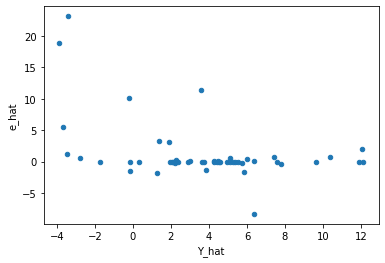

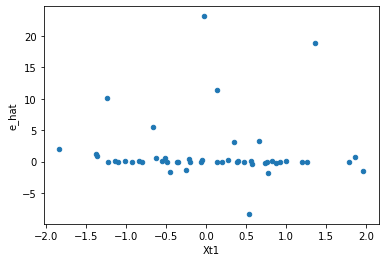

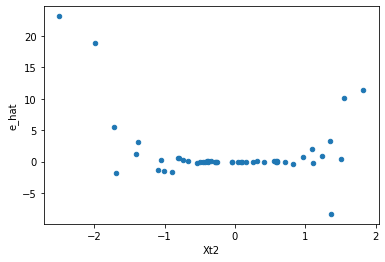

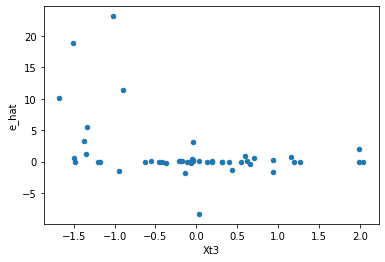

In [14]:
new_table.plot(x ='Y_hat', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt1', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt2', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt3', y='e_hat', kind = 'scatter')